In [32]:
import pandas as pd
import numpy as np 
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

In [4]:
df = pd.read_csv(r'C:\Users\diabl\Desktop\MMA Program\Winter 2020 - 1\Entreprise Analytics\Entreprise Final Project\accidents.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'Side', 'City', 'County', 'State', 'Timezone',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [20]:
df['Temperature(F)'].head()

49    90.0
52    72.0
73    46.0
75    89.0
91    41.0
Name: Temperature(F), dtype: float64

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

Unnamed: 0               0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Timezone                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

# Causal Inference

In [27]:
model=CausalModel(
        data = df,
        treatment=["Wind_Speed(mph)"],
        outcome="Severity",
        common_causes = ['Precipitation(in)','Stop','Temperature(F)'])

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Wind_Speed(mph)'] on outcome ['Severity']


INFO:dowhy.causal_graph:Using Matplotlib for plotting
C:\Users\diabl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\diabl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


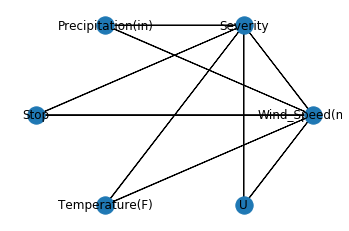

In [28]:
model.view_model()

## Identify the effect

In [29]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Temperature(F)', 'Stop', 'U', 'Precipitation(in)']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


## Estimate the effect

In [30]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)
print(estimate)
#print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Severity~Wind_Speed(mph)+Temperature(F)+Stop+Precipitation(in)


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(Expectation(Severity|Temperature(F),Stop,Precipitation(in))
d[Wind_Speed(mph)]                                                            

 
)
 
Estimand assumption 1, Unconfoundedness: If U→{Wind_Speed(mph)} and U→Severity then P(Severity|Wind_Speed(mph),Temperature(F),Stop,Precipitation(in),U) = P(Severity|Wind_Speed(mph),Temperature(F),Stop,Precipitation(in))
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Severity~Wind_Speed(mph)+Temperature(F)+Stop+Precipitation(in)
## Estimate
Value: 0.007804344988364242

## Statistical Significance
p-value: <0.001



## Refute